In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.shape

(2000, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [10]:
df = df.rename(columns={'DiabetesPedigreeFunction': 'DPF'})

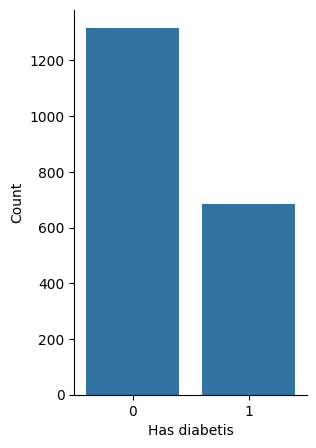

In [11]:
plt.figure(figsize=(3, 5))
sns.countplot(x='Outcome', data=df)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Has diabetis')
plt.ylabel('Count')
plt.show()

In [12]:
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

In [13]:
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

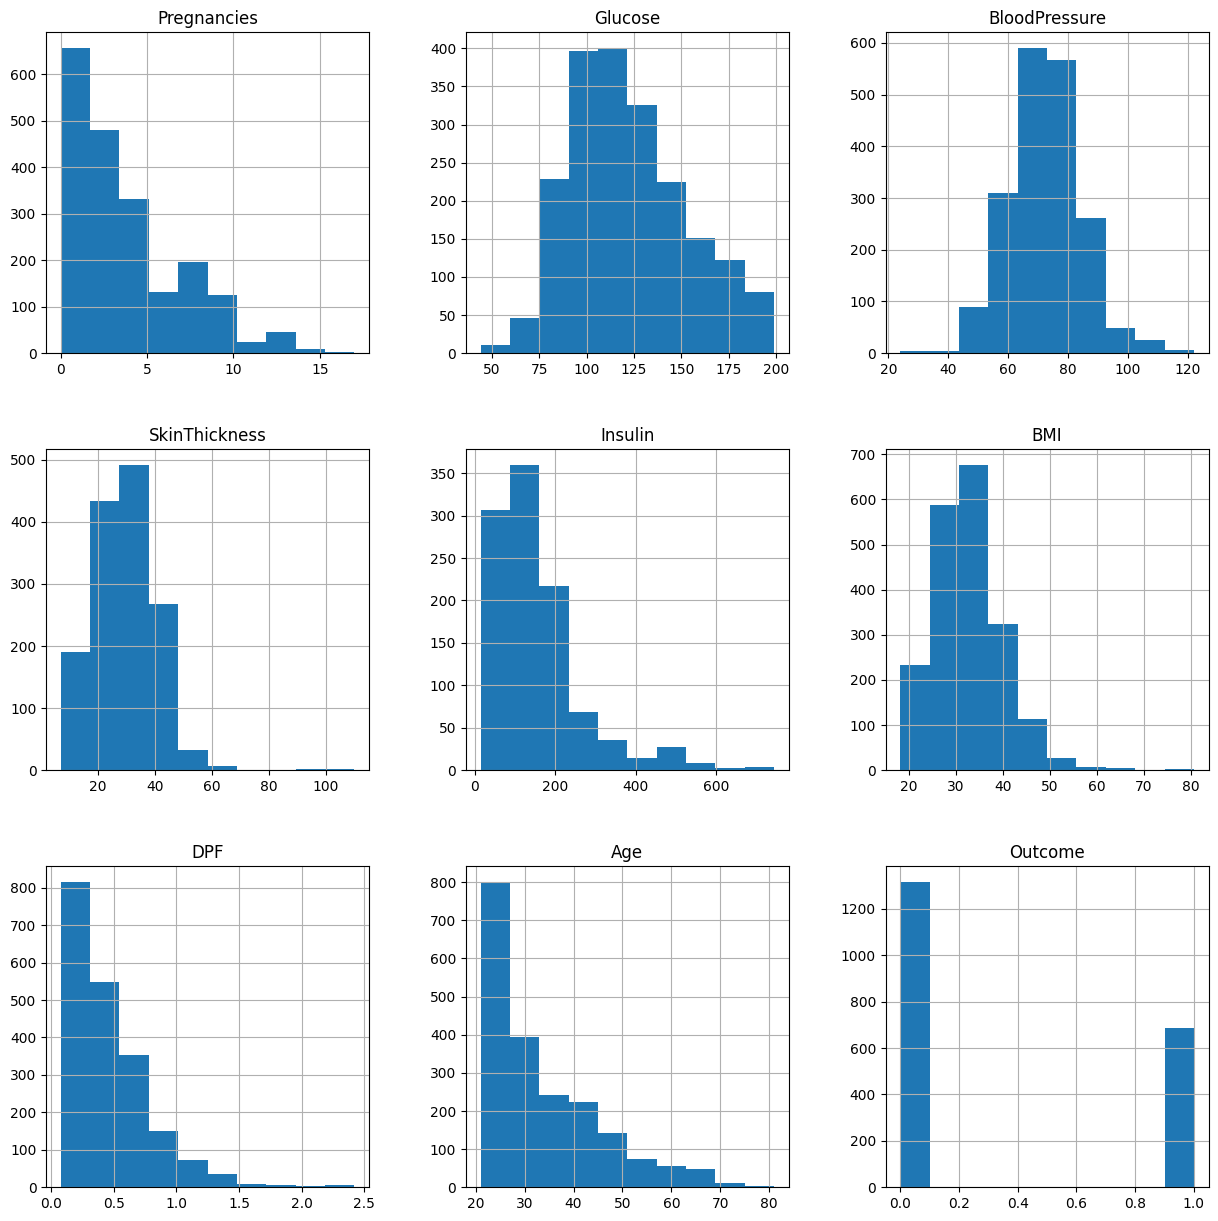

In [14]:
g = df_copy.hist(figsize=(15,15))

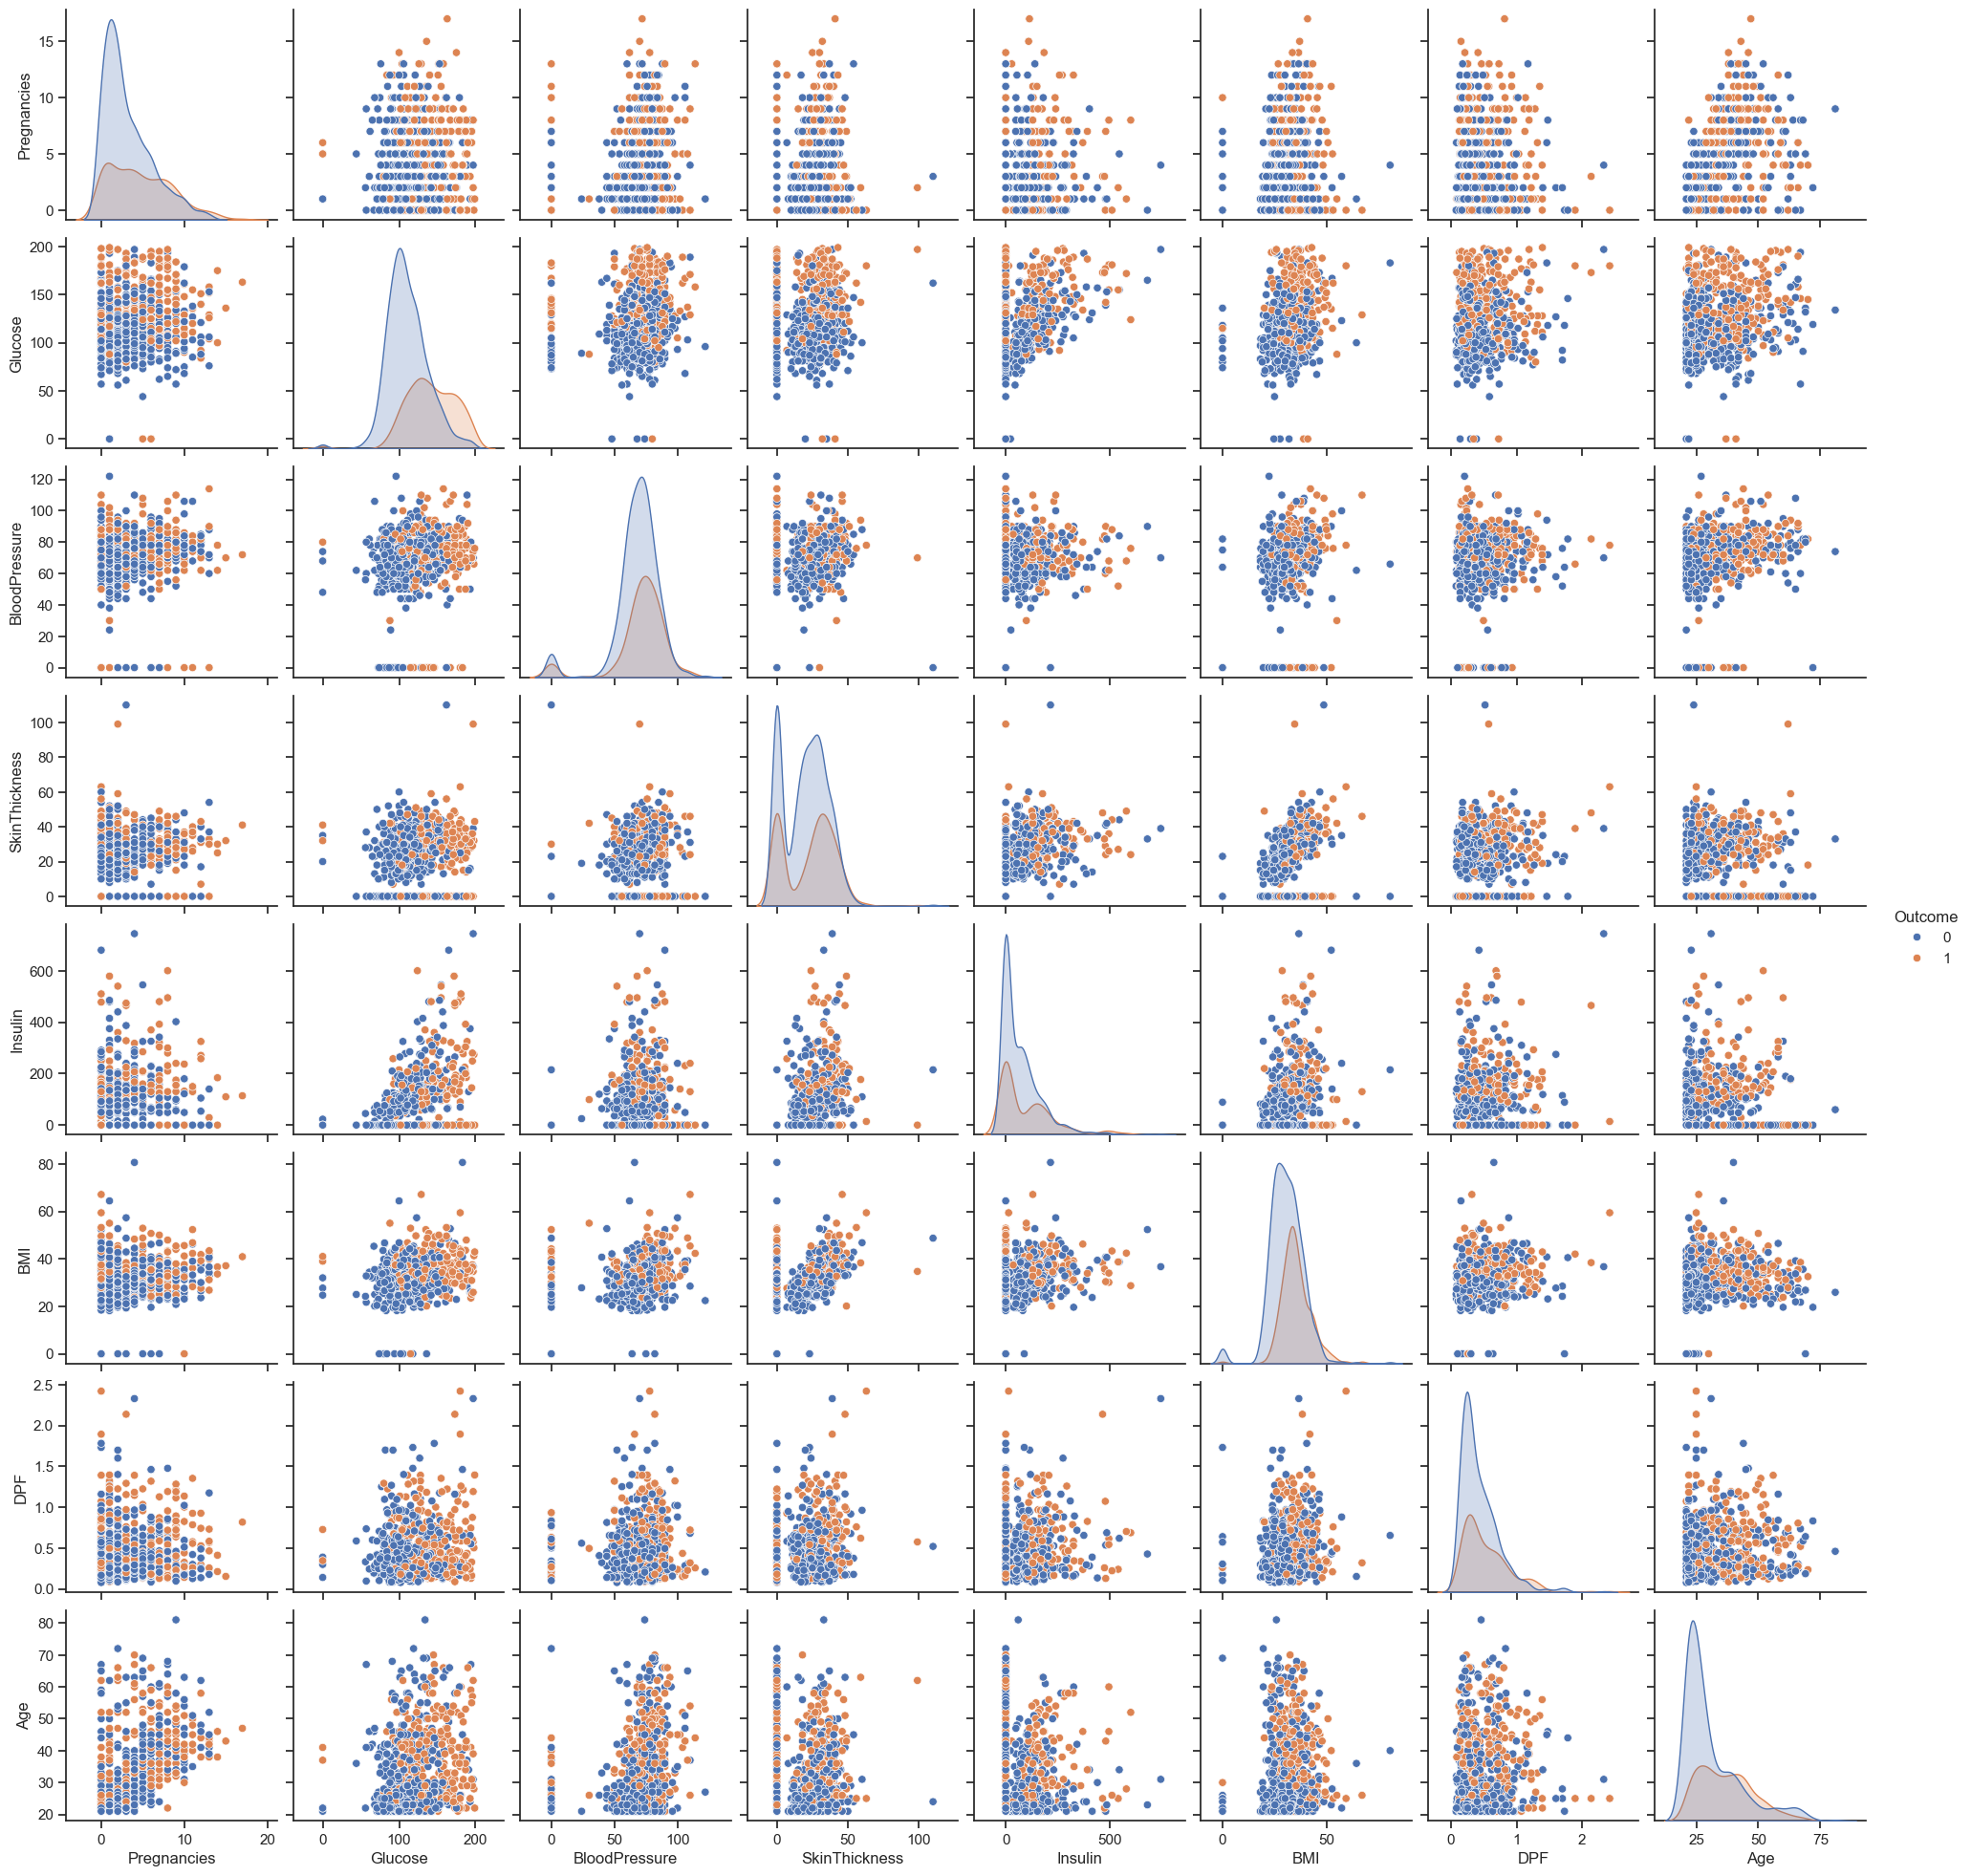

In [15]:
sns.set_theme(style='ticks')
sns.pairplot(data=df, hue='Outcome')

## Missing value imputation

In [16]:
df_copy.isna().any()

Pregnancies      False
Glucose           True
BloodPressure     True
SkinThickness     True
Insulin           True
BMI               True
DPF              False
Age              False
Outcome          False
dtype: bool

In [17]:
df_copy['Glucose'] = df_copy['Glucose'].fillna(df_copy['Glucose'].mean())

In [18]:
df_copy.fillna({'BloodPressure': df['BloodPressure'].mean()}, inplace=True)

In [19]:
df_copy.fillna({'SkinThickness': df_copy['SkinThickness'].median()}, inplace=True)
df_copy.fillna({'Insulin': df_copy['Insulin'].median()}, inplace=True)
df_copy.fillna({'BMI': df_copy['BMI'].median()}, inplace=True)

In [20]:
df_copy.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [21]:
y = df_copy['Outcome']
X = df_copy.drop(columns='Outcome')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf_rf = RandomForestClassifier()

In [29]:
score = cross_val_score(clf_rf, X_train, y_train, cv=5)

In [30]:
print(score.mean())

0.9581249999999999


## Data preprocessing

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [32]:
pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

In [33]:
df_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

In [34]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age']

In [35]:
col_trans = ColumnTransformer(transformers=[
    ('col_trans', pipe, cols)],
                              remainder = 'drop',
                              n_jobs = -1)

In [37]:
y = df_copy['Outcome']
X = df_copy.drop(columns='Outcome', axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [39]:
X_train = col_trans.fit_transform(X_train)
X_test = col_trans.transform(X_test)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [45]:
def best_classification_model(X, y, cv=5, model={'forest': RandomForestClassifier(random_state=42)}):
    result_dict = {'Model Name': [], 'Accuracy': []}
    for key, value in model.items():
        score = cross_val_score(value, X, y, cv=cv, scoring='accuracy')
        result_dict['Model Name'].append(str(model[key]).rstrip('()'))
        result_dict['Accuracy'].append(round(score.mean(), 3)) 
    return result_dict

In [46]:
model_dict = {'logi_clf': LogisticRegression(), 'svc': SVC(), 
              'forest_clf': RandomForestClassifier(),
              'tree_clf': DecisionTreeClassifier()}

In [47]:
result = best_classification_model(X_train, y_train, model=model_dict)

In [52]:
res_df = pd.DataFrame(data=result, index=range(1, len(result['Model Name'])+1))
res_df

,Model Name,Accuracy
1,LogisticRegression,0.768
2,SVC,0.808
3,RandomForestClassifier,0.954
4,DecisionTreeClassifier,0.942


In [53]:
# Finding the best model
best_result = max(result['Accuracy'])
ind = np.argmax(result['Accuracy'])
best_model = result['Model Name'][ind]

In [54]:
print(f"Best model      : {best_model} \nAccuracy rate   : {round(best_result*100, 1)}%")

Best model      : RandomForestClassifier 
Accuracy rate   : 95.4%


## Fine tuning the best model

In [55]:
rf_clf = RandomForestClassifier(random_state=42)

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid_params = {'n_estimators': [100, 150, 200, 250, 300], 'max_features': [2, 4, 6, 8], 'max_depth': [2, 5, 8, None]}
grid_cv = GridSearchCV(rf_clf, grid_params, cv=5, scoring='accuracy', n_jobs=-1)

In [58]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, None],
                         'max_features': [2, 4, 6, 8],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')

In [59]:
grid_cv.best_params_

{'max_depth': None, 'max_features': 2, 'n_estimators': 100}

## Prepare final model pipeline

In [60]:
num_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

In [61]:
columns = [0, 1, 2, 3, 4, 5, 6, 7]

In [62]:
col_trans = ColumnTransformer(transformers=[
    ('num', num_pipe, columns)],
                             remainder='drop',
                              n_jobs=-1
                             )

In [63]:
rf_clf_best = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)

In [64]:
pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('rf_best', rf_clf_best)
])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [66]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('rf_best',
                 RandomForestClassifier(max_features=2, random_state=42))])

In [67]:
y_pred = pipeline.predict(X_test)

In [68]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       253
           1       0.99      0.97      0.98       147

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



In [70]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
cm_df = pd.DataFrame(cm, columns=['Diabetis', 'No Diabetis'], index=['Diabetis', 'No Diabetis'])
cm_df

,Diabetis,No Diabetis
Diabetis,143,4
No Diabetis,2,251


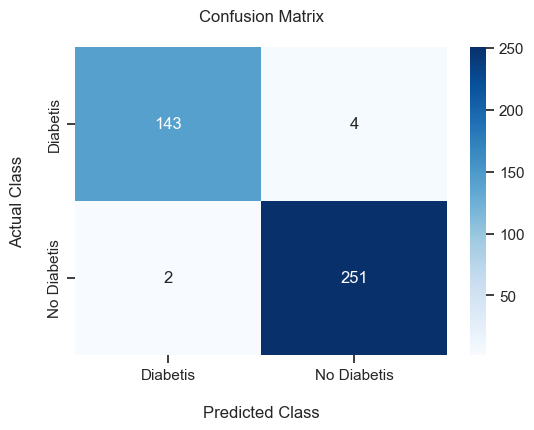

In [71]:
plt.figure(figsize=(6,4))
p = sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('\nPredicted Class')
plt.ylabel('Actual Class\n')
plt.title('Confusion Matrix\n')
plt.show()

## Save final model with its parameters

In [72]:
import pickle

In [73]:
pickle.dump(pipeline, open('diabetes_prediction.pkl', 'wb'))

In [74]:
final_model = pickle.load(open('diabetes_prediction.pkl', 'rb'))

## Prediction

In [75]:
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, BMI, DPF, age):
    preg = int(pregnancies)
    glu = float(glucose)
    bp = int(blood_pressure)
    skin = float(skin_thickness)
    insul = float(insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(age)
    input = np.array([preg, glu, bp, skin, insul, bmi, dpf, age], dtype=object).reshape(1, 8)
    return final_model.predict(input)

In [76]:
df.sample(random_state=42)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
1860,4,111,72,47,207,37.1,1.39,56,1


In [79]:
test1 = predict_diabetes(4, 111, 72, 47, 207, 37.1, 1.39, 56)
if test1:
    print("Unfortunately you appear to develop diabetes. \nPlease consult your physician immediately :(")
else:
    print("Good news! No diabetes is detected :)")

Unfortunately you appear to develop diabetes. 
Please consult your physician immediately :(


In [74]:
df.sample(random_state=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
674,8,91,82,0,0,35.6,0.587,68,0


In [81]:
test2 = predict_diabetes(8, 91, 82, 0, 0, 35.6, 0.587, 68)
if test2:
    print("Unfortunately you appear to develop diabetes. \nPlease consult your physician immediately :(")
else:
    print("Good news! No diabetes is detected :)")

Good news! No diabetes is detected :)


In [83]:
df.sample(random_state=99)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
1414,3,111,56,39,0,30.1,0.557,30,0


In [84]:
test3 = predict_diabetes(3, 111, 56, 39, 0, 30.1, 0.557, 30)
if test2:
    print("Unfortunately you appear to develop diabetes. \nPlease consult your physician immediately :(")
else:
    print("Good news! No diabetes is detected :)")

Good news! No diabetes is detected :)
